In [1]:
#import libraries
import numpy 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import scipy.stats as st 
# import dtale 
import warnings
from sklearn.model_selection import StratifiedKFold 

from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
import pandas_profiling as pdp
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve

In [10]:
# pip install pandas_profiling


In [2]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

In [12]:
fd_ori=fd_dlvry.copy(deep=True)
#future uses one copy create

In [3]:
fd_dlvry.shape

(388, 55)

In [16]:
dict(fd_dlvry["Gender"].value_counts())

{'Male': 222, 'Female': 166}

In [14]:
fd_dlvry.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [15]:
fd_dlvry['Age'].value_counts()

23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
30     9
20     9
31     8
19     4
33     1
18     1
Name: Age, dtype: int64

In [16]:
fd_dlvry['Output'].value_counts()

Yes    301
No      87
Name: Output, dtype: int64

In [17]:
fd_dlvry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [18]:
# d = dtale.show(fd_dlvry)
# d.open_browser()
#we can use datle library for EDA

In [19]:
# looking data with pdp.ProfileReport 
data = pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

#Creating the Exploratory Data Analysis of our dataset
report = pdp.ProfileReport(data, title='Pandas Profiling Report')


In [20]:
report.widgets

In [11]:
#this library i found on google it's helpful for cleaning data,imputing value and lable encoding
import  datacleaner as dc # pip install datacleaner

dc.autoclean(fd_dlvry).head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,...,1,1,1,1,1,1,1,1,1,136
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,...,4,4,4,4,4,4,4,4,1,135
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,...,0,4,1,4,4,0,4,1,1,119
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,...,4,0,1,4,4,4,4,0,1,176
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,...,0,0,1,0,0,0,4,4,1,129


In [12]:
fd_dlvry['Output'].unique()

array([1, 0])

In [13]:
fd_dlvry['Output'].unique()

array([1, 0])

In [14]:
fd_ori.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [15]:
l1=(fd_ori.columns[:])
l1

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [16]:
fd_dlvry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    int32  
 2   Marital Status                             388 non-null    int32  
 3   Occupation                                 388 non-null    int32  
 4   Monthly Income                             388 non-null    int32  
 5   Educational Qualifications                 388 non-null    int32  
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [17]:
df=fd_ori.drop('Reviews',axis=1) #drop reviews because it's take NLP in future i will try it
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [18]:
%matplotlib inline

In [19]:
# we needs to back map for lable encoding 
lbl=dict()
for i in fd_ori.columns:
    if i not in  ['latitude','longitude','Pin code','Output','Reviews']:
                  lbl[i]=dict(zip(fd_ori[i].unique(), fd_dlvry[i].unique()))
    

In [20]:
lbl

{'Age': {20: 20,
  24: 24,
  22: 22,
  27: 27,
  23: 23,
  21: 21,
  28: 28,
  25: 25,
  32: 32,
  30: 30,
  31: 31,
  26: 26,
  18: 18,
  19: 19,
  33: 33,
  29: 29},
 'Gender': {'Female': 0, 'Male': 1},
 'Marital Status': {'Single': 2, 'Married': 0, 'Prefer not to say': 1},
 'Occupation': {'Student': 3,
  'Employee': 0,
  'Self Employeed': 2,
  'House wife': 1},
 'Monthly Income': {'No Income': 4,
  'Below Rs.10000': 2,
  'More than 50000': 3,
  '10001 to 25000': 0,
  '25001 to 50000': 1},
 'Educational Qualifications': {'Post Graduate': 2,
  'Graduate': 0,
  'Ph.D': 1,
  'Uneducated': 4,
  'School': 3},
 'Family size': {4: 4, 3: 3, 6: 6, 2: 2, 5: 5, 1: 1},
 'Medium (P1)': {'Food delivery apps': 1,
  'Walk-in': 2,
  'Direct call': 0,
  'Web browser': 3},
 'Medium (P2)': {' Web browser': 2, ' Direct call': 0, ' Walk-in': 1},
 'Meal(P1)': {'Breakfast': 0, 'Snacks': 3, 'Lunch': 2, 'Dinner': 1},
 'Meal(P2)': {' Lunch': 1, ' Dinner': 0, ' Snacks': 2},
 'Perference(P1)': {'Non Veg foods (L

In [21]:
# practice chi-squared test
# df=pd.crosstab(fd_ori['Meal(P1)'],fd_ori['Occupation'])
# df

# stat, p, dof, expected = st.chi2_contingency(df,correction=True)
# stat, p, dof, expected




#  method 1: Feature selection by phi coefficient

In [22]:
#phi perform for find relation between 
crv={}
l1=[]
for i in fd_ori.columns:
    if i not in  ['latitude','longitude','Pin code','Output','Reviews']:
        '''we are not using lat and long because in EDA all location diffrent (reference dtale lib)'''
        df=pd.crosstab(fd_ori['Output'],fd_ori[i])
        stat, p, dof, expected = st.chi2_contingency(df,correction=True)
     
        deno=sum(df.sum())
        x=numpy.sqrt(stat / deno)
        if(x>0.40): #thresold
             l1.append((i,x))


crv['Output']=l1
        
crv

{'Output': [('Age', 0.41916612670006054),
  ('Ease and convenient', 0.6944483749782563),
  ('Time saving', 0.6333333550979008),
  ('More restaurant choices', 0.5897138785369491),
  ('Easy Payment option', 0.5571767618313485),
  ('More Offers and Discount', 0.5564505912203883),
  ('Good Food quality', 0.4243449172824401),
  ('Good Tracking system', 0.41749280981704445),
  ('Unaffordable', 0.40917014994986045),
  ('Maximum wait time', 0.4135981980209824)]}

In [23]:
#Extract the feature from above dictionary 
basic_f0=[]
for i in l1:
    basic_f0.append(i[0])

basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Unaffordable',
 'Maximum wait time']

In [24]:
X=fd_dlvry[basic_f0] # select X 
y=fd_dlvry['Output'] # select Y


In [25]:
y.unique()

array([1, 0])

In [26]:
%matplotlib inline

In [27]:
basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Unaffordable',
 'Maximum wait time']

<AxesSubplot:xlabel='Output', ylabel='count'>

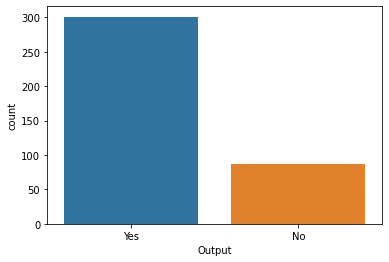

In [28]:
sns.countplot(fd_ori['Output']) # look target feature

#  KNN Algorithm  

In [29]:
# train_test_split by sklearn 
X=fd_dlvry[basic_f0]
y=fd_dlvry['Output']
# from imblearn.under_sampling import NearMiss
# nm=NearMiss()
# Make data balanced
from imblearn.over_sampling import RandomOverSampler
nm=RandomOverSampler(0.5)
X,y=nm.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [30]:
fd_dlvry['Output'].value_counts()

1    301
0     87
Name: Output, dtype: int64

In [31]:
X.shape,y.shape

((451, 10), (451,))

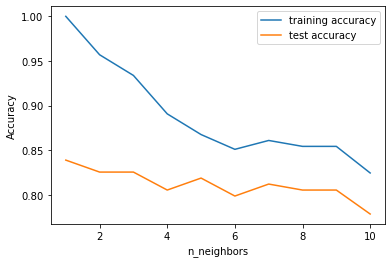

In [32]:
#select best knneighbour find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

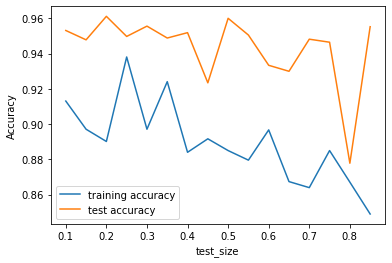

In [33]:
# appropriate test size find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)
knn = KNeighborsClassifier(n_neighbors = 3,p=1)
for i in test_size:
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
        knn.fit(X_train, y_train)
        training_accuracy.append(knn.score(X_test, y_test))
        test_accuracy.append(knn.score(X_train, y_train))
  

    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()

In [34]:
#split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [35]:
# fit data and perform the knn algo
neigh = KNeighborsClassifier(n_neighbors=5,p=1)

knn=neigh.fit(X_train,y_train)

knn.score(X_test,y_test)


0.9292035398230089

In [36]:
#y_pred for confusion matrix
y_pred=knn.predict(X_test)

In [37]:
#confusion matrix 
cf_matrix_n=confusion_matrix(y_test, y_pred)
cf_matrix_n

array([[29,  4],
       [ 4, 76]], dtype=int64)

In [38]:
#classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.95      0.95      0.95        80

    accuracy                           0.93       113
   macro avg       0.91      0.91      0.91       113
weighted avg       0.93      0.93      0.93       113



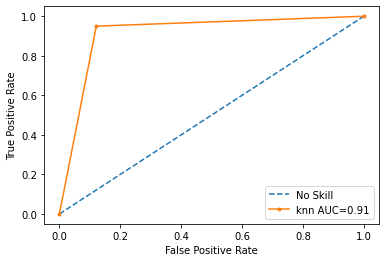

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
AUC=round(metrics.auc(fpr, tpr),2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label=f'knn AUC={AUC}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


<b> Conclusion: </b>

In [40]:
'''Here weighted avg f1-score is good and AUC is greate but problems here Knn is not learning something
knn just use more memory space for perform operation and mostly features are categorical so noise affect
on this algorithms
'''

'Here weighted avg f1-score is good and AUC is greate but problems here Knn is not learning something\nknn just use more memory space for perform operation and mostly features are categorical so noise affect\non this algorithms\n'

<b> Cross-Validation </b>

In [41]:
#without StratifiedKFold 
Knn=KNeighborsClassifier(n_neighbors=5,p=1)
score=cross_val_score(knn,X,y,cv=12)
print("mean:="+str(score.mean()),"std :"+str(score.std()))

mean:=0.8873873873873874 std :0.05326953503842964


In [42]:
#with StratifiedKFold 
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    knn.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.9210526315789473, 0.8157894736842105, 0.9210526315789473, 0.8157894736842105, 1.0, 0.7631578947368421, 0.868421052631579, 0.8918918918918919, 0.8918918918918919, 0.8648648648648649, 0.8648648648648649, 0.8648648648648649]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 76.31578947368422 %

Average Accuracy That can be obtained from this model is:: 0.8736367946894262

Standard Deviation is: 0.05794173555781533


# method 2: feature selection using SelectKBest

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

In [44]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [45]:
#select feature 
l1=['latitude','longitude','Pin code','Output','Reviews']
X=fd_dlvry[fd_dlvry.columns[~fd_dlvry.columns.isin(l1)]]
y=fd_dlvry['Output']
nm=RandomOverSampler(0.5)
X,y=nm.fit_resample(X,y)
X.shape

(451, 50)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Feature 0: 9.217348
Feature 1: 0.002555
Feature 2: 22.200005
Feature 3: 28.329415
Feature 4: 17.994555
Feature 5: 8.078422
Feature 6: 1.075916
Feature 7: 0.191377
Feature 8: 0.691791
Feature 9: 0.080650
Feature 10: 0.153874
Feature 11: 3.022678
Feature 12: 0.039712
Feature 13: 5.905818
Feature 14: 2.419491
Feature 15: 2.405375
Feature 16: 7.461723
Feature 17: 15.314500
Feature 18: 4.849025
Feature 19: 0.004962
Feature 20: 44.507042
Feature 21: 5.782612
Feature 22: 18.199132
Feature 23: 0.228425
Feature 24: 30.239774
Feature 25: 4.786544
Feature 26: 16.714680
Feature 27: 1.473942
Feature 28: 1.277291
Feature 29: 16.658641
Feature 30: 1.381590
Feature 31: 0.188008
Feature 32: 2.024413
Feature 33: 0.371258
Feature 34: 11.020739
Feature 35: 26.405555
Feature 36: 9.474307
Feature 37: 7.265941
Feature 38: 1.609182
Feature 39: 9.799662
Feature 40: 0.477918
Feature 41: 0.550171
Feature 42: 6.920005
Feature 43: 0.800753
Feature 44: 0.010495
Feature 45: 1.122362
Feature 46: 10.568676
Feature 47:

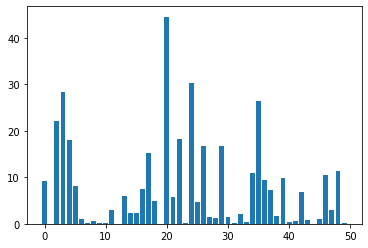

In [47]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
     print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

plt.show()

In [48]:
# Extract feature 
basic_f1=[]
for i in range(len(fs.scores_)):
    if(fs.scores_[i]>10): # set Thresold
        print(X_test.columns[i])
        basic_f1.append(X_test.columns[i])

Marital Status
Occupation
Monthly Income
More Offers and Discount
Self Cooking
Late Delivery
Bad past experience
Unaffordable
Delay of delivery person picking up food
Order Time
Maximum wait time
Freshness 
Good Taste 


# KNN Algorithm 

In [49]:
X=fd_dlvry[basic_f1]
y=fd_dlvry['Output']

nm=RandomOverSampler()
X,y=nm.fit_resample(X,y)

In [50]:
X.shape

(602, 13)

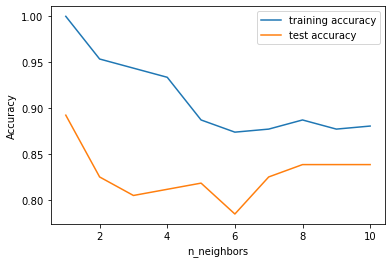

In [51]:
#neighbour find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i,p=1)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

In [52]:
# here some Extra work it's take long time to running
# plt.figure()
# training_accuracy = []
# test_accuracy = []
# # try n_neighbors from 1 to 10
# test_size= numpy.arange(0.1, 0.9,0.05)
# knn = KNeighborsClassifier(n_neighbors = 3)
# for i in test_size:
    
    
#     test_score = []
#     train_score=[]
#     for j in range(1,1000):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=6)
#         knn.fit(X_train, y_train)
#         test_score.append(knn.score(X_test, y_test))
#         train_score.append(knn.score(X_train, y_train))
  

       
#     training_accuracy.append(np.mean(train_score))
#     # record generalization accuracy
#     test_accuracy.append(np.mean(test_score))

# plt.plot(test_size,training_accuracy,label="training accuracy")
# plt.plot(test_size,test_accuracy,label="test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("test_size")
# plt.legend()

# plt.show()

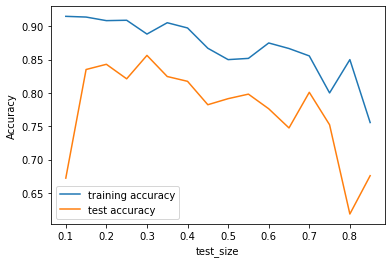

In [53]:
# appropriate test size find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)
knn = KNeighborsClassifier(n_neighbors = 5)
for i in test_size:
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
        knn.fit(X_train, y_train)
        training_accuracy.append(knn.score(X_train,y_train))
        test_accuracy.append(knn.score(X_test,y_test))
  

    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()

In [54]:
#split data into test data and train data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

neigh = KNeighborsClassifier(n_neighbors=5)

knn=neigh.fit(X_train,y_train)

knn.score(X_test,y_test)

0.8008298755186722

In [55]:
y_pred=knn.predict(X_test)

In [56]:
#confusion matrix 
cf_matrix_n=confusion_matrix(y_test, y_pred)
cf_matrix_n

array([[112,  18],
       [ 30,  81]], dtype=int64)

In [57]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       130
           1       0.82      0.73      0.77       111

    accuracy                           0.80       241
   macro avg       0.80      0.80      0.80       241
weighted avg       0.80      0.80      0.80       241



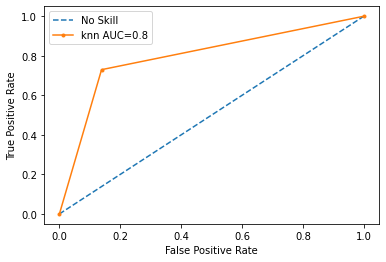

In [58]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
AUC=round(metrics.auc(fpr, tpr),2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label=f'knn AUC={AUC}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


<b> Conclusion:</b>

In [59]:
'''feature selection method affect our model,AUC decrease as compare to the first one'''

'feature selection method affect our model,AUC decrease as compare to the first one'

<b> Cross-Validation </b>

In [60]:
#without StratifiedKFold 
Knn=KNeighborsClassifier(n_neighbors=5,p=1)
score=cross_val_score(knn,X,y,cv=12)
print("mean:="+str(score.mean()),"std :"+str(score.std()))

mean:=0.833921568627451 std :0.05886066366016818


In [61]:
#with StratifiedKFold 
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    knn.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.8627450980392157, 0.8627450980392157, 0.8, 0.84, 0.82, 0.86, 0.86, 0.78, 0.82, 0.86, 0.84, 0.84]

Maximum Accuracy That can be obtained from this model is: 86.27450980392157 %

Minimum Accuracy: 78.0 %

Average Accuracy That can be obtained from this model is:: 0.8371241830065359

Standard Deviation is: 0.026037529147156523


#  Logistics Regression


In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
# Here we are using  both method for feature selection  means we takes union both feature union

f_feature=list(set(basic_f0).union(set(basic_f1)))

In [64]:
f_feature

['Easy Payment option',
 'Good Food quality',
 'Age',
 'Time saving',
 'More Offers and Discount',
 'Freshness ',
 'Occupation',
 'Delay of delivery person picking up food',
 'Order Time',
 'Maximum wait time',
 'Ease and convenient',
 'Bad past experience',
 'More restaurant choices',
 'Good Taste ',
 'Good Tracking system',
 'Late Delivery',
 'Monthly Income',
 'Unaffordable',
 'Self Cooking',
 'Marital Status']

# Now we need to use some domain knowlegde for selecting feature
Group 1: {'Ease and convenient','Easy Payment option'}\
Group 2 :{'Order Time','Time saving','Delay of delivery person picking up food','Maximum wait time'}\
f_feature=['Ease and convenient','Self Cooking','Maximum wait time','More restaurant choices',
  'Unaffordable', 'More Offers and Discount', 'Good Food quality', 'Good Tracking system', 'Age', 'Bad past experience']

In [65]:
#select X,y 

X=fd_dlvry[f_feature]
y=fd_dlvry['Output']
from imblearn.under_sampling import NearMiss
# nm=NearMiss()
#try to making data balnaced 
nm=RandomOverSampler()
X,y=nm.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [66]:
X.shape

(602, 20)

In [67]:
f_feature

['Easy Payment option',
 'Good Food quality',
 'Age',
 'Time saving',
 'More Offers and Discount',
 'Freshness ',
 'Occupation',
 'Delay of delivery person picking up food',
 'Order Time',
 'Maximum wait time',
 'Ease and convenient',
 'Bad past experience',
 'More restaurant choices',
 'Good Taste ',
 'Good Tracking system',
 'Late Delivery',
 'Monthly Income',
 'Unaffordable',
 'Self Cooking',
 'Marital Status']

In [68]:
Lg=LogisticRegression()

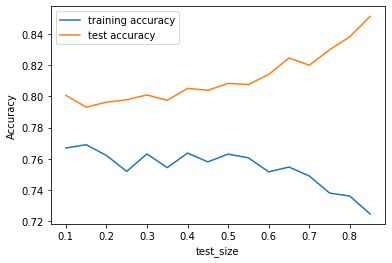

In [69]:
#
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)

for i in test_size:
        t_s=[]
        tn_=[]
        for j in range(0,50):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=np.random.randint(0,100))
            Lg.fit(X_train, y_train)
            
            t_s.append(Lg.score(X_test,y_test))
            tn_.append(Lg.score(X_train,y_train))
        training_accuracy.append(np.mean(t_s))
        test_accuracy.append(np.mean(tn_))


    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()




In [70]:
#data split into train and test size 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
Lg.fit(X_train,y_train)
Lg.score(X_test,y_test)

0.7182320441988951

In [71]:
y_pred=Lg.predict(X_test)

In [72]:
cf_matrix=confusion_matrix(y_test, y_pred)
cf_matrix

array([[67, 22],
       [29, 63]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        89
           1       0.74      0.68      0.71        92

    accuracy                           0.72       181
   macro avg       0.72      0.72      0.72       181
weighted avg       0.72      0.72      0.72       181



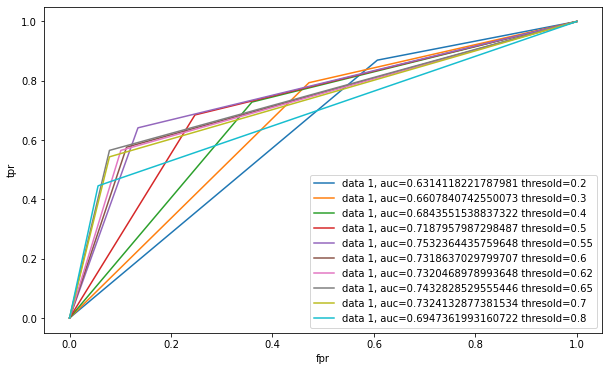

In [74]:
thresolds = [0.2,0.3,0.4,0.5,0.55,0.6,0.62,0.65,0.7,0.8]
plt.figure(figsize=(10,6))
for i in thresolds:
    y_pred_proba = (Lg.predict_proba(X_test)[:,1]>=i).astype(int)
    fpr, tpr, m= metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=f"data 1, auc={auc} thresold={i}")
    plt.legend(loc=4)



plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [75]:
'''In Knn weighted avg f1-score is good and AUC is great but problems in Knn is not learning something
knn just use more memory space for perform operation and mostly features are categorical so noise affect
on this algorithms. Here we can see if we set thresold 0.65 in Logistics regression we get better model  and here algorithms 
something learn 
'''

'In Knn weighted avg f1-score is good and AUC is great but problems in Knn is not learning something\nknn just use more memory space for perform operation and mostly features are categorical so noise affect\non this algorithms. Here we can see if we set thresold 0.65 in Logistics regression we get better model  and here algorithms \nsomething learn \n'

<b> Cross-Validation </b>

In [76]:
score=cross_val_score(Lg,X,y,cv=10)
print('List of possible accuracy:', score) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(score)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(score)) 
print('\nStandard Deviation is:',np.std(score)) 

List of possible accuracy: [0.73770492 0.80327869 0.86666667 0.68333333 0.73333333 0.73333333
 0.78333333 0.76666667 0.73333333 0.8       ]

Maximum Accuracy That can be obtained from this model is: 86.66666666666667 %

Minimum Accuracy: 78.0 %

Average Accuracy That can be obtained from this model is:: 0.7640983606557377

Standard Deviation is: 0.04876466726787546


In [77]:
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    Lg.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(Lg.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.7647058823529411, 0.7450980392156863, 0.7, 0.78, 0.84, 0.76, 0.82, 0.72, 0.76, 0.82, 0.8, 0.82]

Maximum Accuracy That can be obtained from this model is: 84.0 %

Minimum Accuracy: 70.0 %

Average Accuracy That can be obtained from this model is:: 0.777483660130719

 Median Accuracy That can be obtained from this model is:: 0.7723529411764706

Standard Deviation is: 0.041809162976093966


In [78]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(Lg, X, y, cv=cv)

array([0.76243094, 0.74585635, 0.73480663, 0.72375691, 0.77900552])

# DecisionTree (feature selection with both method)  

In [79]:
X=fd_dlvry[f_feature]
y=fd_dlvry['Output']
nm=RandomOverSampler() # try to making data balanced 
X,y=nm.fit_resample(X,y)
fd_dlvry['Output'].value_counts()

1    301
0     87
Name: Output, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [81]:
clf.score(X_test,y_test)

0.964824120603015

In [82]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1])

In [83]:
print(confusion_matrix(y_test,y_pred))

[[99  3]
 [ 4 93]]


In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       102
           1       0.97      0.96      0.96        97

    accuracy                           0.96       199
   macro avg       0.96      0.96      0.96       199
weighted avg       0.96      0.96      0.96       199



In [85]:
cross_val_score(clf, X, y, cv=12)

array([0.94117647, 0.80392157, 0.86      , 0.94      , 0.92      ,
       0.96      , 0.86      , 1.        , 0.84      , 0.98      ,
       0.98      , 0.98      ])

In [86]:
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(Lg.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.7843137254901961, 0.803921568627451, 0.78, 0.72, 0.9, 0.72, 0.8, 0.68, 0.74, 0.84, 0.82, 0.84]

Maximum Accuracy That can be obtained from this model is: 90.0 %

Minimum Accuracy: 68.0 %

Average Accuracy That can be obtained from this model is:: 0.7856862745098039

 Median Accuracy That can be obtained from this model is:: 0.7921568627450981

Standard Deviation is: 0.05958386600665798


In [87]:
import graphviz
import sklearn.tree as tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names='01',
                                filled=True)

# # Draw graph
graph = graphviz.Source(dot_data,format="png") 
graph.render('gini')
# graph

'gini.png'

# Feature selection with Decision Tree 

In [88]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

fd_dlvry.drop(['Pin code','longitude','latitude','Reviews'],axis=1,inplace=True)

fd_dlvry['Output']=fd_dlvry['Output'].replace({'Yes':1,'No':0})

In [89]:
fd_ori=fd_dlvry.copy(deep=True)
df=pd.get_dummies(fd_dlvry)
df.shape

(388, 223)

In [90]:
l1=[]
for i in df.columns:
    if(i!='Output'):
        l1.append(i)
    

In [91]:
X=df[l1]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_resample(X,y)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [93]:
clf.score(X_test,y_test)

0.9698492462311558

In [94]:
clf.feature_importances_

array([0.01944862, 0.        , 0.        , 0.00706532, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01127087, 0.        , 0.        , 0.4267788 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.16964191,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0008406 , 0.        ,
       0.        , 0.        , 0.        , 0.05508952, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [95]:
def feature_extract(clf,l1):
    values = clf.feature_importances_
    importances = [(l1[i], values[i]) for i in range(len(l1))]
    importances.sort(reverse=True, key=lambda x:x[1])
    l3=[]
    for i in importances[:12]:
        l3.append(i[0])
    return l3

    

In [96]:
feature_extract(clf,l1)

['Ease and convenient_Disagree',
 'More restaurant choices_Disagree',
 'Unaffordable_Agree',
 'Good Food quality_Agree',
 'Missing item_Neutral',
 'Unavailability_Disagree',
 'Maximum wait time_15 minutes',
 'Late Delivery_Disagree',
 'Age',
 'Delay of delivery person getting assigned_Disagree',
 'Delay of delivery person getting assigned_Neutral',
 'Unavailability_Agree']

In [97]:
X=df[l1]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_resample(X,y)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [99]:
clf.score(X_test,y_test)

0.9798994974874372

In [100]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1], dtype=int64)

In [101]:
print(confusion_matrix(y_test,y_pred))

[[ 93   2]
 [  2 102]]


In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.98      0.98      0.98       104

    accuracy                           0.98       199
   macro avg       0.98      0.98      0.98       199
weighted avg       0.98      0.98      0.98       199



In [103]:
lst_accu_stratified = [] 
x=0
feature_common=pd.DataFrame()
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    feature_common[x]=feature_extract(clf,l1)
    x+=1
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.8627450980392157, 0.9411764705882353, 0.92, 0.98, 0.92, 0.92, 0.92, 0.9, 0.92, 0.88, 0.98, 0.94]

Maximum Accuracy That can be obtained from this model is: 98.0 %

Minimum Accuracy: 86.27450980392157 %

Average Accuracy That can be obtained from this model is:: 0.9236601307189544

 Median Accuracy That can be obtained from this model is:: 0.92

Standard Deviation is: 0.03312326476279602


In [104]:
feature_common

,0,1,2,3,4,5,6,7,8,9,10,11
0,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree
1,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree
2,Politeness_Very Important,Missing item_Neutral,Missing item_Neutral,Politeness_Very Important,Missing item_Neutral,Unaffordable_Agree,Missing item_Neutral,Missing item_Neutral,Missing item_Neutral,High Quality of package_Very Important,Missing item_Neutral,Occupation_Student
3,Missing item_Neutral,Politeness_Very Important,Politeness_Very Important,Missing item_Neutral,Politeness_Very Important,Occupation_Student,Occupation_Student,Politeness_Very Important,Politeness_Very Important,Unaffordable_Agree,Politeness_Very Important,Missing item_Neutral
4,Bad past experience_Agree,Delivery person ability_Strongly Agree,Unavailability_Disagree,Time saving_Disagree,Time saving_Disagree,Missing item_Neutral,Unaffordable_Agree,Age,Unavailability_Disagree,Occupation_Student,Delivery person ability_Strongly Agree,Unaffordable_Agree
5,Unaffordable_Strongly disagree,Unavailability_Disagree,Delivery person ability_Strongly Agree,Bad past experience_Agree,Influence of rating_Yes,Perference(P2)_ Sweets,Perference(P2)_ Sweets,Delay of delivery person picking up food_Agree,Delivery person ability_Strongly Agree,Unavailability_Disagree,Unavailability_Disagree,Perference(P2)_ Sweets
6,Late Delivery_Disagree,Bad past experience_Agree,Unaffordable_Strongly disagree,Late Delivery_Disagree,Unaffordable_Strongly disagree,Unavailability_Disagree,Unavailability_Disagree,Unaffordable_Strongly disagree,Bad past experience_Agree,Meal(P1)_Breakfast,Unaffordable_Strongly disagree,Unavailability_Disagree
7,Good Road Condition_Strongly Agree,Late Delivery_Disagree,Bad past experience_Agree,Unaffordable_Strongly disagree,Age,Late Delivery_Disagree,Maximum wait time_15 minutes,Temperature_Moderately Important,Late Delivery_Disagree,Missing item_Strongly agree,Bad past experience_Agree,Maximum wait time_15 minutes
8,Time saving_Disagree,Temperature_Moderately Important,Late Delivery_Disagree,Long delivery time_Strongly agree,Late Delivery_Disagree,Maximum wait time_15 minutes,Delay of delivery person getting assigned_Stro...,Late Delivery_Disagree,Influence of time_Maybe,Marital Status_Prefer not to say,Late Delivery_Disagree,Late Delivery_Disagree
9,Delay of delivery person getting assigned_Stro...,Long delivery time_Strongly agree,More Offers and Discount_Disagree,Wrong order delivered_Strongly disagree,Maximum wait time_15 minutes,Medium (P2)_ Direct call,Late Delivery_Disagree,Bad past experience_Agree,Delay of delivery person picking up food_Neutral,Late Delivery_Disagree,Long delivery time_Strongly agree,Delay of delivery person getting assigned_Stro...


In [105]:
l2=feature_extract(clf,l1)

In [106]:
relation_between_feature=pd.DataFrame(index=l2)

In [107]:
relation_between_feature.head()

""
Ease and convenient_Disagree
More restaurant choices_Disagree
Occupation_Student
Missing item_Neutral
Unaffordable_Agree


In [108]:
X[l2]

,Ease and convenient_Disagree,More restaurant choices_Disagree,Occupation_Student,Missing item_Neutral,Unaffordable_Agree,Perference(P2)_ Sweets,Unavailability_Disagree,Maximum wait time_15 minutes,Late Delivery_Disagree,Delay of delivery person getting assigned_Strongly agree,High Quality of package_Important,Bad past experience_Strongly disagree
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
597,1,1,1,1,1,0,0,1,0,0,0,0
598,1,1,0,0,1,1,0,0,1,0,1,0
599,0,0,1,0,0,0,0,0,1,1,1,1
600,0,1,0,0,0,0,0,0,0,0,0,0


In [109]:

for i in l2:
    l1=[]
    for j in l2:
        df_t=pd.crosstab(X[j],X[i])
        stat, p, dof, expected = st.chi2_contingency(df_t,correction=True)
        t=min(df_t.shape)-1
        deno=sum(df_t.sum())
        x=np.sqrt(stat / deno)
        l1.append(x)
    relation_between_feature[i]=l1
    



        


In [110]:
relation_between_feature

,Ease and convenient_Disagree,More restaurant choices_Disagree,Occupation_Student,Missing item_Neutral,Unaffordable_Agree,Perference(P2)_ Sweets,Unavailability_Disagree,Maximum wait time_15 minutes,Late Delivery_Disagree,Delay of delivery person getting assigned_Strongly agree,High Quality of package_Important,Bad past experience_Strongly disagree
Ease and convenient_Disagree,0.996217,0.457911,0.262644,0.026529,0.287400,0.306028,0.117532,0.401575,0.064385,0.157233,0.150037,0.167755
More restaurant choices_Disagree,0.457911,0.995637,0.332012,0.058896,0.091603,0.278781,0.010809,0.265637,0.059832,0.062879,0.069187,0.123781
Occupation_Student,0.262644,0.332012,0.996630,0.058540,0.054972,0.079206,0.074880,0.159565,0.072938,0.051460,0.024764,0.136224
Missing item_Neutral,0.026529,0.058896,0.058540,0.994625,0.049314,0.215496,0.128236,0.104858,0.152888,0.093115,0.212776,0.095823
Unaffordable_Agree,0.287400,0.091603,0.054972,0.049314,0.995541,0.004618,0.294204,0.056154,0.062337,0.009234,0.103189,0.120290
Perference(P2)_ Sweets,0.306028,0.278781,0.079206,0.215496,0.004618,0.994553,0.216388,0.055389,0.067905,0.077793,0.054034,0.112265
Unavailability_Disagree,0.117532,0.010809,0.074880,0.128236,0.294204,0.216388,0.996256,0.122654,0.003714,0.067353,0.022356,0.051464
Maximum wait time_15 minutes,0.401575,0.265637,0.159565,0.104858,0.056154,0.055389,0.122654,0.994589,0.037144,0.079167,0.079818,0.059314
Late Delivery_Disagree,0.064385,0.059832,0.072938,0.152888,0.062337,0.067905,0.003714,0.037144,0.993955,0.031054,0.052223,0.048754
Delay of delivery person getting assigned_Strongly agree,0.157233,0.062879,0.051460,0.093115,0.009234,0.077793,0.067353,0.079167,0.031054,0.992636,0.132505,0.003431


In [111]:
fd_dlvry.shape

(388, 51)

In [112]:
relation_between_feature.style.apply(lambda x: ["background: red" if v>0.25 and v<0.99 else "" for v in x], axis = 1)

,Ease and convenient_Disagree,More restaurant choices_Disagree,Occupation_Student,Missing item_Neutral,Unaffordable_Agree,Perference(P2)_ Sweets,Unavailability_Disagree,Maximum wait time_15 minutes,Late Delivery_Disagree,Delay of delivery person getting assigned_Strongly agree,High Quality of package_Important,Bad past experience_Strongly disagree
Ease and convenient_Disagree,0.996217,0.457911,0.262644,0.026529,0.287400,0.306028,0.117532,0.401575,0.064385,0.157233,0.150037,0.167755
More restaurant choices_Disagree,0.457911,0.995637,0.332012,0.058896,0.091603,0.278781,0.010809,0.265637,0.059832,0.062879,0.069187,0.123781
Occupation_Student,0.262644,0.332012,0.996630,0.058540,0.054972,0.079206,0.074880,0.159565,0.072938,0.051460,0.024764,0.136224
Missing item_Neutral,0.026529,0.058896,0.058540,0.994625,0.049314,0.215496,0.128236,0.104858,0.152888,0.093115,0.212776,0.095823
Unaffordable_Agree,0.287400,0.091603,0.054972,0.049314,0.995541,0.004618,0.294204,0.056154,0.062337,0.009234,0.103189,0.120290
Perference(P2)_ Sweets,0.306028,0.278781,0.079206,0.215496,0.004618,0.994553,0.216388,0.055389,0.067905,0.077793,0.054034,0.112265
Unavailability_Disagree,0.117532,0.010809,0.074880,0.128236,0.294204,0.216388,0.996256,0.122654,0.003714,0.067353,0.022356,0.051464
Maximum wait time_15 minutes,0.401575,0.265637,0.159565,0.104858,0.056154,0.055389,0.122654,0.994589,0.037144,0.079167,0.079818,0.059314
Late Delivery_Disagree,0.064385,0.059832,0.072938,0.152888,0.062337,0.067905,0.003714,0.037144,0.993955,0.031054,0.052223,0.048754
Delay of delivery person getting assigned_Strongly agree,0.157233,0.062879,0.051460,0.093115,0.009234,0.077793,0.067353,0.079167,0.031054,0.992636,0.132505,0.003431


In [113]:
multicolinear_feature=["Perference(P2)_ Sweets","Maximum wait time_15 minutes","More restaurant choices_Disagree"]

In [114]:
final_feature=list(relation_between_feature.columns)

In [115]:
final_feature

['Ease and convenient_Disagree',
 'More restaurant choices_Disagree',
 'Occupation_Student',
 'Missing item_Neutral',
 'Unaffordable_Agree',
 'Perference(P2)_ Sweets',
 'Unavailability_Disagree',
 'Maximum wait time_15 minutes',
 'Late Delivery_Disagree',
 'Delay of delivery person getting assigned_Strongly agree',
 'High Quality of package_Important',
 'Bad past experience_Strongly disagree']

In [116]:
set1 = set(final_feature)
set2 = set(multicolinear_feature)
final_feature = list(set1 - set2)

In [117]:
final_feature

['High Quality of package_Important',
 'Unaffordable_Agree',
 'Occupation_Student',
 'Bad past experience_Strongly disagree',
 'Late Delivery_Disagree',
 'Missing item_Neutral',
 'Ease and convenient_Disagree',
 'Delay of delivery person getting assigned_Strongly agree',
 'Unavailability_Disagree']

In [118]:

import graphviz
import sklearn.tree as tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names='01',
                                filled=True)

# # Draw graph
graph = graphviz.Source(dot_data,format="png") 
graph.render('fgini')
# graph

'fgini.png'

# Decesion Tree model

In [119]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

fd_dlvry.drop(['Pin code','longitude','latitude','Reviews'],axis=1,inplace=True)

fd_dlvry['Output']=fd_dlvry['Output'].replace({'Yes':1,'No':0})

In [120]:
fd_dlvry.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Medium (P1),Medium (P2),Meal(P1),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,Female,Single,Student,No Income,Post Graduate,4,Food delivery apps,Web browser,Breakfast,...,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,1
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,Food delivery apps,Web browser,Snacks,...,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,1
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,Food delivery apps,Direct call,Lunch,...,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,1
3,22,Female,Single,Student,No Income,Graduate,6,Food delivery apps,Walk-in,Snacks,...,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,1
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,Walk-in,Direct call,Lunch,...,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,1


In [121]:
fd_ori=fd_dlvry.copy(deep=True)
df=pd.get_dummies(fd_dlvry)
df.shape

(388, 223)

In [122]:
final_feature=['Unaffordable_Agree',
 'Delay of delivery person getting assigned_Strongly agree',
 'Long delivery time_Agree',
 'Wrong order delivered_Strongly disagree',
 'Missing item_Neutral',
 'Unavailability_Disagree',
 'Occupation_Student',
 'Ease and convenient_Disagree',
 'Late Delivery_Disagree']

In [123]:
final_feature

['Unaffordable_Agree',
 'Delay of delivery person getting assigned_Strongly agree',
 'Long delivery time_Agree',
 'Wrong order delivered_Strongly disagree',
 'Missing item_Neutral',
 'Unavailability_Disagree',
 'Occupation_Student',
 'Ease and convenient_Disagree',
 'Late Delivery_Disagree']

In [124]:
X=df[final_feature]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_resample(X,y)


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [126]:
clf.score(X_test,y_test)

0.8944723618090452

In [127]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0], dtype=int64)

In [128]:
print(confusion_matrix(y_test,y_pred))

[[87 15]
 [ 6 91]]


In [129]:
lst_accu_stratified = [] 
x=0
x=0
feature_common=pd.DataFrame()
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.9019607843137255, 0.8431372549019608, 0.88, 0.9, 0.88, 0.92, 0.84, 0.82, 0.82, 0.94, 0.88, 0.88]

Maximum Accuracy That can be obtained from this model is: 94.0 %

Minimum Accuracy: 82.0 %

Average Accuracy That can be obtained from this model is:: 0.8754248366013074

 Median Accuracy That can be obtained from this model is:: 0.88

Standard Deviation is: 0.03650337037217721


In [130]:
list_1=[1,0,1,0,1,0,0,0,0]
pre=np.array(list_1).reshape(1,-1)
nk=dict(zip(X_test.columns,list_1))
nk


{'Unaffordable_Agree': 1,
 'Delay of delivery person getting assigned_Strongly agree': 0,
 'Long delivery time_Agree': 1,
 'Wrong order delivered_Strongly disagree': 0,
 'Missing item_Neutral': 1,
 'Unavailability_Disagree': 0,
 'Occupation_Student': 0,
 'Ease and convenient_Disagree': 0,
 'Late Delivery_Disagree': 0}

In [131]:
# import graphviz
# import sklearn.tree as tree
# # DOT data
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                 feature_names=X_test.columns,  
#                                 class_names='01',
#                                 filled=True)

# # # Draw graph
# graph = graphviz.Source(dot_data,format="png") 
# graph.render('fgini')
# # graph

In [132]:
clf.predict(pre)

array([0], dtype=int64)

In [133]:
nk.keys()

dict_keys(['Unaffordable_Agree', 'Delay of delivery person getting assigned_Strongly agree', 'Long delivery time_Agree', 'Wrong order delivered_Strongly disagree', 'Missing item_Neutral', 'Unavailability_Disagree', 'Occupation_Student', 'Ease and convenient_Disagree', 'Late Delivery_Disagree'])

In [134]:
fd_dlvry['Missing item'].unique()

array(['Agree', 'Strongly agree', 'Disagree', 'Neutral',
       'Strongly disagree'], dtype=object)

# Random forest


## Feature selection by Random forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=6,min_samples_split=4)

In [136]:
from sklearn.feature_selection import SelectFromModel

In [137]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

nm=RandomOverSampler()
X,y=nm.fit_resample(X,y)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=RandomForestClassifier(max_depth=5,min_samples_split=2)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [139]:
lst_accu_stratified = [] 
x=0
feature_common=pd.DataFrame()
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    feature_common[x]=feature_extract(clf,X_train.columns)
    x+=1
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
   
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.8888888888888888, 0.9166666666666666, 0.9444444444444444, 1.0, 0.9444444444444444, 0.9166666666666666, 0.8888888888888888, 0.8611111111111112, 0.9714285714285714, 0.9428571428571428, 0.8857142857142857, 0.9714285714285714]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 86.11111111111111 %

Average Accuracy That can be obtained from this model is:: 0.9277116402116402

 Median Accuracy That can be obtained from this model is:: 0.9297619047619048

Standard Deviation is: 0.04009895054665435


In [140]:
feature_common

,0,1,2,3,4,5,6,7,8,9,10,11
0,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important
1,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important
2,Good Taste _Important,Temperature_Very Important,Freshness _Very Important,Freshness _Very Important,Temperature_Very Important,Freshness _Very Important,Temperature_Very Important,Temperature_Very Important,Temperature_Very Important,Freshness _Very Important,Temperature_Very Important,Freshness _Very Important
3,Temperature_Very Important,Good Taste _Moderately Important,Good Taste _Important,Temperature_Very Important,Freshness _Very Important,Good Taste _Important,Freshness _Very Important,Freshness _Very Important,Good Taste _Moderately Important,Good Taste _Important,Good Taste _Important,Temperature_Very Important
4,Freshness _Very Important,Good Taste _Important,Temperature_Very Important,Good Taste _Important,Good Taste _Important,Temperature_Very Important,Good Taste _Moderately Important,Good Taste _Moderately Important,Good Taste _Important,Temperature_Very Important,Freshness _Very Important,Good Taste _Important
5,Good Taste _Moderately Important,Freshness _Very Important,Good Taste _Moderately Important,Good Quantity_Moderately Important,Good Taste _Moderately Important,Good Quantity_Moderately Important,Good Taste _Important,Good Taste _Important,Freshness _Very Important,Good Taste _Moderately Important,Good Taste _Moderately Important,Good Taste _Moderately Important
6,Good Quantity_Moderately Important,Good Quantity_Moderately Important,Good Quantity_Moderately Important,Good Taste _Moderately Important,Good Quantity_Moderately Important,Good Taste _Moderately Important,Good Quantity_Slightly Important,Good Quantity_Moderately Important,Good Quantity_Moderately Important,Good Quantity_Moderately Important,Freshness _Important,Good Quantity_Moderately Important
7,Good Quantity_Slightly Important,Temperature_Important,Freshness _Important,Good Quantity_Slightly Important,Freshness _Important,High Quality of package_Moderately Important,High Quality of package_Very Important,Temperature_Important,Freshness _Important,High Quality of package_Very Important,Good Quantity_Moderately Important,High Quality of package_Very Important
8,Freshness _Important,Freshness _Important,Temperature_Important,High Quality of package_Moderately Important,Good Quantity_Slightly Important,Good Quantity_Slightly Important,Good Quantity_Moderately Important,Good Quantity_Slightly Important,Politeness_Very Important,Freshness _Important,Good Quantity_Slightly Important,Freshness _Important
9,Age,Temperature_Slightly Important,High Quality of package_Moderately Important,Politeness_Very Important,Missing item_Strongly agree,Temperature_Important,High Quality of package_Moderately Important,High Quality of package_Moderately Important,Temperature_Important,Age,Temperature_Slightly Important,Good Quantity_Slightly Important


In [141]:
feature_common[2]

0                          Good Quantity_Important
1                       Good Taste _Very Important
2                        Freshness _Very Important
3                            Good Taste _Important
4                       Temperature_Very Important
5                 Good Taste _Moderately Important
6               Good Quantity_Moderately Important
7                             Freshness _Important
8                            Temperature_Important
9     High Quality of package_Moderately Important
10                  Temperature_Slightly Important
11                                             Age
Name: 2, dtype: object

## Build Model

In [142]:
X=df[feature_common[2]]
y=df.iloc[:,-1]

In [143]:
from  imblearn.under_sampling import RandomUnderSampler

nm=RandomUnderSampler()
X,y=nm.fit_resample(X,y)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=RandomForestClassifier(max_depth=6,min_samples_split=4)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=4)

In [145]:
clf.score(X_test,y_test)

0.9739130434782609

In [146]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0], dtype=uint8)

In [147]:
print(confusion_matrix(y_test,y_pred))

[[60  2]
 [ 1 52]]


In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.96      0.98      0.97        53

    accuracy                           0.97       115
   macro avg       0.97      0.97      0.97       115
weighted avg       0.97      0.97      0.97       115



In [149]:
lst_accu_stratified = [] 
x=0

skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
   
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.9655172413793104, 0.9655172413793104, 1.0, 1.0, 1.0, 1.0, 0.9310344827586207, 0.9655172413793104, 1.0, 1.0, 1.0, 0.9310344827586207]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 93.10344827586206 %

Average Accuracy That can be obtained from this model is:: 0.9798850574712644

 Median Accuracy That can be obtained from this model is:: 1.0

Standard Deviation is: 0.026179406836621552


## (Final Model)Using method 1 feature through build model

In [150]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')
fd_ori=fd_dlvry.copy()

fd_dlvry.drop(['Pin code','longitude','latitude','Reviews'],axis=1,inplace=True)

fd_dlvry['Output']=fd_dlvry['Output'].replace({'Yes':1,'No':0})

In [151]:
basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Unaffordable',
 'Maximum wait time']

In [152]:
# import  datacleaner as dc # pip install datacleaner
dc.autoclean(fd_dlvry).head() 

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Medium (P1),Medium (P2),Meal(P1),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0,2,3,4,2,4,1,2,0,...,2,1,1,1,1,1,1,1,1,1
1,24,0,2,3,2,0,3,1,2,3,...,2,4,4,4,4,4,4,4,4,1
2,22,1,2,3,2,2,3,1,0,2,...,2,0,4,1,4,4,0,4,1,1
3,22,0,2,3,4,0,6,1,1,3,...,2,4,0,1,4,4,4,4,0,1
4,22,1,2,3,2,2,4,2,0,2,...,2,0,0,1,0,0,0,4,4,1


In [153]:
lbl=dict()
for i in fd_ori.columns:
    if i not in  ['latitude','longitude','Pin code','Reviews']:
                  lbl[i]=dict(zip(fd_ori[i].unique(), fd_dlvry[i].unique()))

In [154]:
lbl

{'Age': {20: 20,
  24: 24,
  22: 22,
  27: 27,
  23: 23,
  21: 21,
  28: 28,
  25: 25,
  32: 32,
  30: 30,
  31: 31,
  26: 26,
  18: 18,
  19: 19,
  33: 33,
  29: 29},
 'Gender': {'Female': 0, 'Male': 1},
 'Marital Status': {'Single': 2, 'Married': 0, 'Prefer not to say': 1},
 'Occupation': {'Student': 3,
  'Employee': 0,
  'Self Employeed': 2,
  'House wife': 1},
 'Monthly Income': {'No Income': 4,
  'Below Rs.10000': 2,
  'More than 50000': 3,
  '10001 to 25000': 0,
  '25001 to 50000': 1},
 'Educational Qualifications': {'Post Graduate': 2,
  'Graduate': 0,
  'Ph.D': 1,
  'Uneducated': 4,
  'School': 3},
 'Family size': {4: 4, 3: 3, 6: 6, 2: 2, 5: 5, 1: 1},
 'Medium (P1)': {'Food delivery apps': 1,
  'Walk-in': 2,
  'Direct call': 0,
  'Web browser': 3},
 'Medium (P2)': {' Web browser': 2, ' Direct call': 0, ' Walk-in': 1},
 'Meal(P1)': {'Breakfast': 0, 'Snacks': 3, 'Lunch': 2, 'Dinner': 1},
 'Meal(P2)': {' Lunch': 1, ' Dinner': 0, ' Snacks': 2},
 'Perference(P1)': {'Non Veg foods (L

In [155]:
X=fd_dlvry[basic_f0]
y=fd_dlvry.iloc[:,-1]
from  imblearn.under_sampling import RandomUnderSampler

nm=RandomUnderSampler()
X,y=nm.fit_resample(X,y)

In [156]:
X.head()

,Age,Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Unaffordable,Maximum wait time
0,25,3,0,3,3,3,3,3,3,2
1,24,0,2,3,3,3,0,0,1,2
2,25,3,0,3,3,3,3,3,3,2
3,28,1,2,1,1,1,4,2,2,3
4,27,0,0,1,3,4,1,3,0,2


In [157]:
X.shape

(174, 10)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=RandomForestClassifier(max_depth=6,min_samples_split=4)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=4)

In [159]:
clf.score(X_test,y_test)

0.7931034482758621

In [160]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [161]:
print(confusion_matrix(y_test,y_pred))

[[19  5]
 [ 7 27]]


In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        24
           1       0.84      0.79      0.82        34

    accuracy                           0.79        58
   macro avg       0.79      0.79      0.79        58
weighted avg       0.80      0.79      0.79        58



In [163]:
lst_accu_stratified = [] 
x=0

skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
   
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.9333333333333333, 0.9333333333333333, 0.8, 0.8, 0.8666666666666667, 0.8666666666666667, 0.9285714285714286, 0.7857142857142857, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.7857142857142857]

Maximum Accuracy That can be obtained from this model is: 93.33333333333333 %

Minimum Accuracy: 78.57142857142857 %

Average Accuracy That can be obtained from this model is:: 0.8738095238095239

 Median Accuracy That can be obtained from this model is:: 0.8976190476190476

Standard Deviation is: 0.06164475310835361


In [164]:
for i in basic_f0:
    print(i,fd_ori[i].unique())

Age [20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
Ease and convenient ['Neutral' 'Strongly agree' 'Agree' 'Strongly disagree' 'Disagree']
Time saving ['Neutral' 'Strongly agree' 'Agree' 'Disagree' 'Strongly disagree']
More restaurant choices ['Neutral' 'Strongly agree' 'Agree' 'Strongly disagree' 'Disagree']
Easy Payment option ['Neutral' 'Strongly agree' 'Agree' 'Disagree' 'Strongly disagree']
More Offers and Discount ['Neutral' 'Strongly agree' 'Agree' 'Disagree' 'Strongly disagree']
Good Food quality ['Neutral' 'Disagree' 'Agree' 'Strongly agree' 'Strongly disagree']
Good Tracking system ['Neutral' 'Agree' 'Strongly agree' 'Disagree' 'Strongly disagree']
Unaffordable ['Neutral' 'Strongly agree' 'Agree' 'Disagree' 'Strongly disagree']
Maximum wait time ['30 minutes' '45 minutes' '60 minutes' 'More than 60 minutes'
 '15 minutes']


In [165]:
basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Unaffordable',
 'Maximum wait time']

In [166]:
lbl

{'Age': {20: 20,
  24: 24,
  22: 22,
  27: 27,
  23: 23,
  21: 21,
  28: 28,
  25: 25,
  32: 32,
  30: 30,
  31: 31,
  26: 26,
  18: 18,
  19: 19,
  33: 33,
  29: 29},
 'Gender': {'Female': 0, 'Male': 1},
 'Marital Status': {'Single': 2, 'Married': 0, 'Prefer not to say': 1},
 'Occupation': {'Student': 3,
  'Employee': 0,
  'Self Employeed': 2,
  'House wife': 1},
 'Monthly Income': {'No Income': 4,
  'Below Rs.10000': 2,
  'More than 50000': 3,
  '10001 to 25000': 0,
  '25001 to 50000': 1},
 'Educational Qualifications': {'Post Graduate': 2,
  'Graduate': 0,
  'Ph.D': 1,
  'Uneducated': 4,
  'School': 3},
 'Family size': {4: 4, 3: 3, 6: 6, 2: 2, 5: 5, 1: 1},
 'Medium (P1)': {'Food delivery apps': 1,
  'Walk-in': 2,
  'Direct call': 0,
  'Web browser': 3},
 'Medium (P2)': {' Web browser': 2, ' Direct call': 0, ' Walk-in': 1},
 'Meal(P1)': {'Breakfast': 0, 'Snacks': 3, 'Lunch': 2, 'Dinner': 1},
 'Meal(P2)': {' Lunch': 1, ' Dinner': 0, ' Snacks': 2},
 'Perference(P1)': {'Non Veg foods (L

In [167]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))


In [168]:
model = pickle.load(open('model.pkl','rb'))


In [169]:
clf.predict_proba(np.array([20,2,3,4,3,1,1,3,4,5]).reshape(1,-1))[0][1]

0.8019783294388556

In [170]:

# import graphviz
# import sklearn.tree as tree
# # DOT data
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                 feature_names=X.columns,  
#                                 class_names='01',
#                                 filled=True)

# # # Draw graph
# graph = graphviz.Source(dot_data,format="png") 
# graph.render('food_final')

## XGBOOST for practicing

In [171]:
from sklearn.model_selection import StratifiedKFold 
def validation(clf,X,y):
    lst_accu_stratified = [] 
    x=0
    skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
    for train_index, test_index in skf.split(X, y): 
        x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
        y_train_fold, y_test_fold = y[train_index], y[test_index] 
        clf.fit(x_train_fold, y_train_fold)
        y_pre=clf.predict(X_test)
        print(classification_report(y_test,y_pre))
        lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))



    print('List of possible accuracy:', lst_accu_stratified) 
    print('\nMaximum Accuracy That can be obtained from this model is:', 
          max(lst_accu_stratified)*100, '%') 
    print('\nMinimum Accuracy:', 
          min(lst_accu_stratified)*100, '%') 
    print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
    print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
    print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 
    
    return None

In [172]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
clf=XGBClassifier(max_depth=4)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

[22:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7586206896551724

In [173]:
y_pre=clf.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        24
           1       0.79      0.79      0.79        34

    accuracy                           0.76        58
   macro avg       0.75      0.75      0.75        58
weighted avg       0.76      0.76      0.76        58



### More Experiment  

In [174]:
fd_dlvry.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Medium (P1),Medium (P2),Meal(P1),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0,2,3,4,2,4,1,2,0,...,2,1,1,1,1,1,1,1,1,1
1,24,0,2,3,2,0,3,1,2,3,...,2,4,4,4,4,4,4,4,4,1
2,22,1,2,3,2,2,3,1,0,2,...,2,0,4,1,4,4,0,4,1,1
3,22,0,2,3,4,0,6,1,1,3,...,2,4,0,1,4,4,4,4,0,1
4,22,1,2,3,2,2,4,2,0,2,...,2,0,0,1,0,0,0,4,4,1


In [6]:
fd_dlvry.columns

NameError: name 'fd_dlvry' is not defined

In [176]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

In [177]:
fd_dlvry.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [178]:
# X=fd_dlvry.iloc[:,0:-1]

X_dummy=pd.get_dummies(fd_dlvry)
y=fd_dlvry.iloc[:,-1]

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size = 0.33)

In [180]:
X_dummy.shape

(388, 408)

In [181]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
clf=XGBClassifier(max_depth=4)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

[22:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5503875968992248

In [182]:
y_pre=clf.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

                                                                                                                                                                                                             precision    recall  f1-score   support

                                                                                                                                                                                                          -       0.00      0.00      0.00         1
                                                                                                                                                                          BAD BAD BAD POOR POOR POOR RATING       0.00      0.00      0.00         0
                                                                                                                                                 BEST BEST BEST !! WONDERFUL WONDERFUL !! FAST FAST FAST !!       1.00      1.00      1.00         1
                   

In [183]:
validation(clf,X,y)

ValueError: Found input variables with inconsistent numbers of samples: [174, 388]

In [ ]:
import pandas as pd
